In [1]:
import numpy as np
import pandas as pd
import math
from collections import deque
import graphviz

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# utilities

def unique_values(target): # will return a dictionary consisting unique states and its total occurances of the target varible 
    record = dict(target.value_counts())
    return record


def entropy(feature): # returns the entropy(randomness) of the feature
    target_record = unique_values(feature)
    total_instance = len(feature)
    entropy_value = 0.0
    for i in target_record.values():
        entropy_value -= (i/total_instance) * math.log2(i/total_instance)
    return entropy_value

def info_gain(X, target, curr_feature): # returns the information gain of the current feature
    dataset_entropy = entropy(target)   # entropy of the whole dataset
    feature_value = set(X[curr_feature]) # gets unique values/states of the current feature
    total_instance = len(target)
    curr_feature_entropy = 0.0
    # formula can be found in the internet/books
    for value in feature_value:
        value_bool = X[curr_feature] == value
        value_entropy = entropy(pd.Series(target[value_bool]))
        value_weight = sum(value_bool) / total_instance
        curr_feature_entropy += value_weight * value_entropy
    information_gain = dataset_entropy - curr_feature_entropy
    return information_gain

def best_feature(X, target, features): # returns the feature that has the highest information gain
    best_feature = None
    highest_info_gain = -1
    for feature in features:
        gain = info_gain(X, target, feature)
        if gain > highest_info_gain:
            highest_info_gain = gain
            best_feature = feature
    return best_feature

def decisionTree(X, target, features): # building the decision tree recursively
    # if there is only one class then just return it
    if(len(set(target)) == 1):
        return target.iloc[0]
    # if there is no feature left to split then return the most frequent class
    if(len(features) == 0):
        return max(target)
    
    # gtting the feature with highest infomation gain
    feature_to_split = best_feature(X, target, features)
    rest_of_features = [feature for feature in features if feature != feature_to_split]
    
    tree = {feature_to_split : {}}
    
    for value in set(X[feature_to_split]):
        value_bool = X[feature_to_split] == value
        X_subset = X[value_bool]
        target_subset = target[value_bool]
        tree[feature_to_split][value] = decisionTree(X_subset, target_subset, rest_of_features)
        
    return tree

#### Function for prediction (Can be used on test set)

In [15]:
def predict(tree, instance): # returns the predicted value for the instance
    feature = list(tree.keys())[0] # feature at root node
    subtree = tree[feature] # will get the subtree under the root node
    value = instance[feature]  # will get the value of position at the particular instance and feature
    if value in subtree:
        prediction = subtree[value]
        if isinstance(prediction, dict): # if prediction is a dictionary type that means there a subtree under it
            return predict(prediction, instance) # recursive call
        else:  # no more subtree under it
            return prediction
    else: # value doesn't exist in the subtree and return the majority state of the parent node
        return max(subtree.values())

In [2]:
data = pd.read_csv("diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [14]:
X = data.drop(columns = ['Outcome'])
target = data['Outcome']
features = list(X.columns)

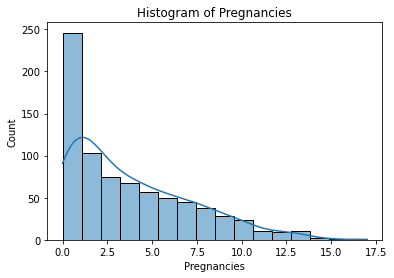

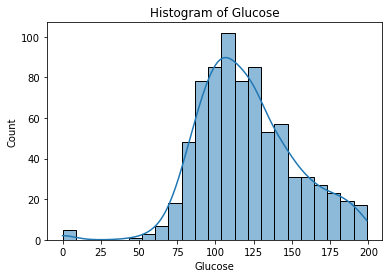

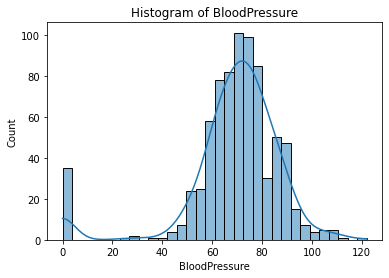

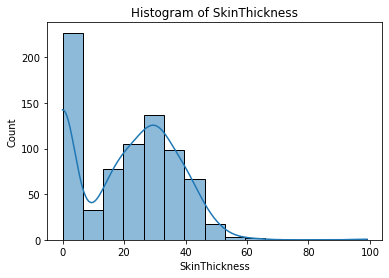

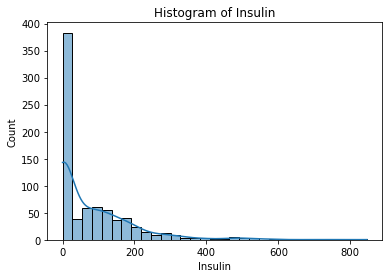

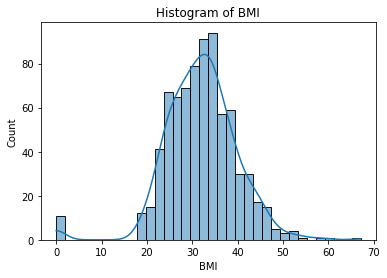

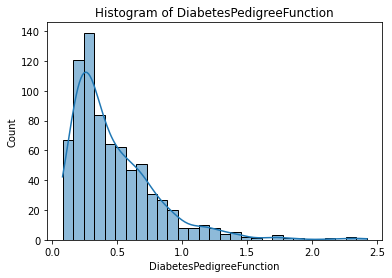

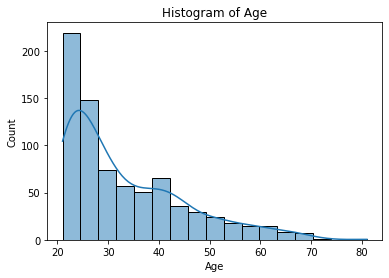

In [9]:
for feature in X.columns:
    sns.histplot(X[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

In [20]:
# transforming each numerical features to categorical values

X["Pregnancies"] = pd.cut(X["Pregnancies"], bins = np.linspace(X['Pregnancies'].min()-1,
                                                               X['Pregnancies'].max(), 4),
                          labels = ['Phase 1', 'Phase 2', 'Phase 3'])

X["Glucose"] = pd.cut(X["Glucose"], bins = np.linspace(X["Glucose"].min()-1, X["Glucose"].max(),4),
                     labels = ["Low", "Normal", "High"])

X["BloodPressure"] = pd.cut(X["BloodPressure"], bins = np.linspace(X["BloodPressure"].min()-1,
                                                                  X["BloodPressure"].max(), 4),
                           labels = ["Low", "Normal", "High"])

X["SkinThickness"] = pd.cut(X["SkinThickness"], bins = np.linspace(X["SkinThickness"].min()-1,
                                                                  X["SkinThickness"].max(), 4),
                           labels = ["Less", "Normal", "More"])

X["Insulin"] = pd.cut(X["Insulin"], bins = np.linspace(X["Insulin"].min()-1, X["Insulin"].max(),4),
                     labels = ["Low", "Normal", "High"])

X["BMI"] = pd.cut(X["BMI"], bins = np.linspace(X["BMI"].min()-1, X["BMI"].max(),4),
                     labels = ["Low", "Normal", "High"])

X["DiabetesPedigreeFunction"] = pd.cut(X["DiabetesPedigreeFunction"], bins = np.linspace(X["DiabetesPedigreeFunction"].min()-1,
                                                                                         X["DiabetesPedigreeFunction"].max(),3),
                                       labels = ["Low", "High"])

X["Age"] = pd.cut(X["Age"], bins = np.linspace(X["Age"].min()-1, X["Age"].max(),4),
                     labels = ["Young", "Middle Age", "Old"])

In [21]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,Phase 2,High,Normal,Normal,Low,Normal,Low,Middle Age
1,Phase 1,Normal,Normal,Less,Low,Normal,Low,Young
2,Phase 2,High,Normal,Less,Low,Normal,Low,Young
3,Phase 1,Normal,Normal,Less,Low,Normal,Low,Young
4,Phase 1,High,Low,Normal,Low,Normal,High,Young
5,Phase 1,Normal,Normal,Less,Low,Normal,Low,Young
6,Phase 1,Normal,Normal,Less,Low,Normal,Low,Young
7,Phase 2,Normal,Low,Less,Low,Normal,Low,Young
8,Phase 1,High,Normal,Normal,Normal,Normal,Low,Middle Age
9,Phase 2,Normal,High,Less,Low,Low,Low,Middle Age


In [22]:
tree = decisionTree(X, target, features)
print(tree)

{'Glucose': {'Low': {'SkinThickness': {'Normal': {'Pregnancies': {'Phase 2': {'BloodPressure': {'Normal': {'Insulin': {'Low': {'BMI': {'Normal': {'DiabetesPedigreeFunction': {'Low': {'Age': {'Middle Age': 1}}}}}}}}}}, 'Phase 1': 0}}, 'Less': {'Age': {'Old': 0, 'Young': {'Pregnancies': {'Phase 1': {'BloodPressure': {'Normal': {'Insulin': {'Low': {'BMI': {'Normal': {'DiabetesPedigreeFunction': {'Low': 1}}}}}}}}}}, 'Middle Age': 0}}}}, 'High': {'Age': {'Old': {'BloodPressure': {'High': {'BMI': {'Low': 0, 'Normal': 1}}, 'Normal': {'SkinThickness': {'Normal': 0, 'More': 1, 'Less': {'Pregnancies': {'Phase 2': 0, 'Phase 1': {'Insulin': {'Low': {'BMI': {'Normal': {'DiabetesPedigreeFunction': {'Low': 1}}}}}}}}}}}}, 'Young': {'BloodPressure': {'Low': 1, 'High': {'BMI': {'High': {'Insulin': {'Low': 1, 'High': 0}}, 'Normal': {'Pregnancies': {'Phase 3': 0, 'Phase 2': {'DiabetesPedigreeFunction': {'Low': {'SkinThickness': {'Normal': {'Insulin': {'Low': 1}}, 'Less': 0}}, 'High': 1}}, 'Phase 1': {'Dia

### To visualize the Tree take a llok at the following code (a png file will be generated on your current directory)

In [28]:
def convert_tree_to_dot(tree, feature_names):
    dot = "digraph Tree {\nnode [shape=box, style=\"filled\", color=\"blue\"] ;\n"
    queue = deque([(tree, "Root")])
    while queue:
        node, label = queue.popleft()
        if isinstance(node, dict):
            for value, subtree in node.items():
                if isinstance(subtree, dict):
                    queue.append((subtree, "{}_{}".format(label, value)))
                    dot += '"{}" -> "{}_{}" [label="{}"] ;\n'.format(label, label, value, value)
                else:
                    if subtree == 1:
                        dot += '"{}" [label="1", shape=ellipse, fillcolor="#9ece9a"] ;\n'.format("{}_{}".format(label, value))
                    else:
                        dot += '"{}" [label="0", shape=ellipse, fillcolor="#ffcccb"] ;\n'.format("{}_{}".format(label, value))
                    dot += '"{}" -> "{}_{}" [label="{}"] ;\n'.format(label, label, value, value)
        else:
            dot += '"{}" [label="{}"] ;\n'.format(label, node)
    dot += "}"
    return dot

# Convert the decision tree to DOT format
dot_data = convert_tree_to_dot(tree, features)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph.render("diabetes", format='png', cleanup=True)
graph.view()


Decision tree visualization created successfully.


In [26]:
type(data['Outcome'][0])

numpy.int64